# Facebook 2019 533M Leaked Data

In [2]:
import os

import pandas as pd
import numpy as np

from IPython.core.display import display, HTML
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

import pycountry

plt.style.use('seaborn')

In [3]:
path_to_data = '../../Downloads/Facebook Leak [2019][533M Records][106 Countries]'

## USA

In [29]:
usa = pd.read_feather(os.path.join(path_to_data,'USA/usa.feather'))
usa.columns

Index(['phone_no', 'user_id', 'fname', 'lname', 'gender', 'city1', 'city2',
       'relationship', 'company', 'seen', 'email', 'unknown'],
      dtype='object')

get all the states from US

In [4]:
states = [x.name for x in pycountry.subdivisions.lookup('US')]
state2code = {x.name:x.code.split('-')[-1] for x in pycountry.subdivisions.lookup('US')}

loop through states and if we find a state in the given address then return that state

In [36]:
def addr_search(addr,lst):
    for c in lst:
        if addr != None and c in addr:
            return c
    return addr

next we will use the previous function and the `state2code` dictionary to get the state and state code form the address we have

In [6]:
usa['state_city1'] = usa.city1.apply(lambda x: addr_search(x,states))
usa['state_city1_code'] = usa['state_city1'].apply(lambda x: state2code.get(x,np.nan))

usa['state_city2'] = usa.city2.apply(lambda x: addr_search(x,states))
usa['state_city2_code'] = usa['state_city2'].apply(lambda x: state2code.get(x,np.nan))

then we want to see where is the largest amount of leaked accounts by state

In [7]:
city_1_summary = usa['state_city1_code'].value_counts().div(len(usa))
city_2_summary = usa['state_city2_code'].value_counts().div(len(usa))

now we can make some nice plots..

### Percentage of leaked accounts by relationship

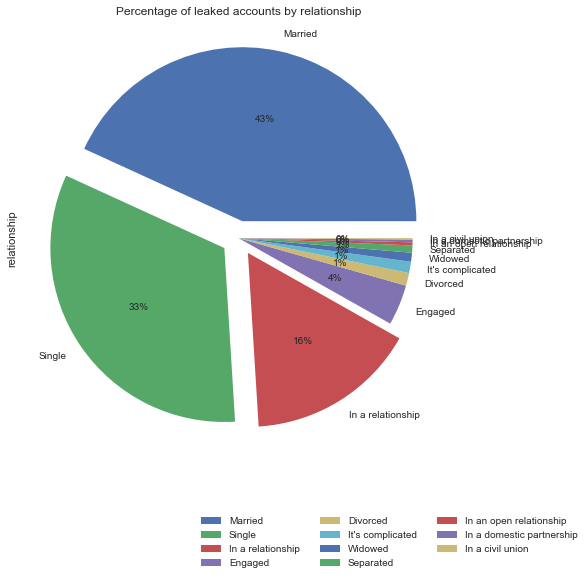

In [39]:
usa.relationship.value_counts().plot.pie(autopct='%1.0f%%',title='Percentage of leaked accounts by relationship',figsize=(8,8),explode=(0.1,0.1,0.1,0,0,0,0,0,0,0,0)).legend(bbox_to_anchor=(1.3,-0.12),ncol=3);

### Top 20 Companies by leaked accounts

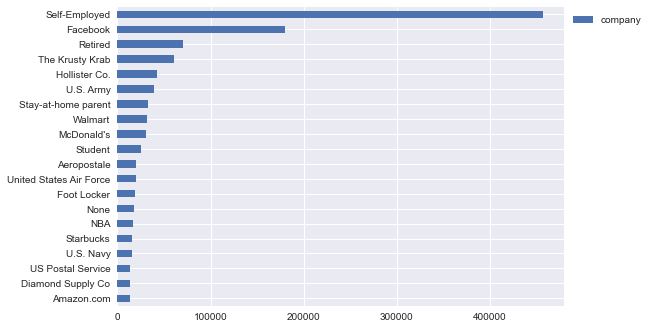

In [10]:
usa.company.value_counts()[:20].sort_values().plot.barh().legend(bbox_to_anchor=(1,1));

### Percentage of missing values in email addresses

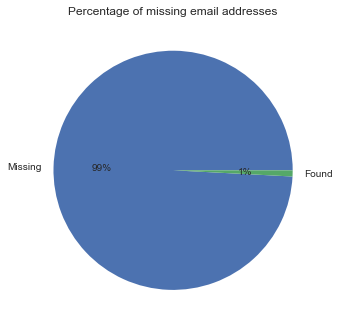

In [23]:
usa.email.isnull().value_counts().rename({True:'Missing',False:'Found'}).plot.pie(autopct='%1.0f%%',title='Percentage of missing email addresses');
plt.ylabel('');

### Percentage of missing values in phone number

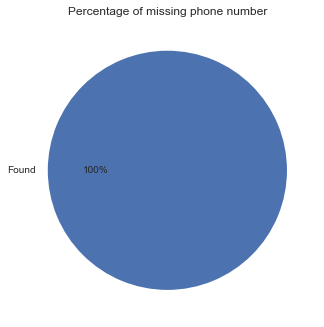

In [28]:
usa.phone_no.isnull().value_counts().rename({True:'Missing',False:'Found'}).plot.pie(autopct='%1.0f%%',title='Percentage of missing phone number');
plt.ylabel('');

## UK

In [30]:
uk = pd.read_feather(os.path.join(path_to_data,'uk/uk.feather'))
uk.columns

Index(['phone_no', 'user_id', 'fname', 'lname', 'gender', 'city1', 'city2',
       'relationship', 'company', 'seen', 'email', 'unknown'],
      dtype='object')

In [176]:
def addr_search_uk(addr,uk_loc_dict):
    for k,v in uk_loc_dict.items():
        if addr != None and k in addr:
            return k
    return np.nan

In [177]:
uk_loc = pd.read_html('https://simple.wikipedia.org/wiki/ISO_3166-2:GB')[0]
uk_loc['Location'] = uk_loc['Location'].str.split('(',expand=True)[0].str.strip()
uk_loc = uk_loc.set_index('Location')['Code'].to_dict()

In [178]:
uk['county_city1'] = uk.city1.apply(lambda x: addr_search_uk(x,uk_loc))
uk['county_city2'] = uk.city2.apply(lambda x: addr_search_uk(x,uk_loc))

In [187]:
uk_city1_summary = uk['county_city1'].value_counts().div(len(uk)).mul(100)
uk_city2_summary = uk['county_city2'].value_counts().div(len(uk)).mul(100)

### Percentage of accounts leaked by cities and counties

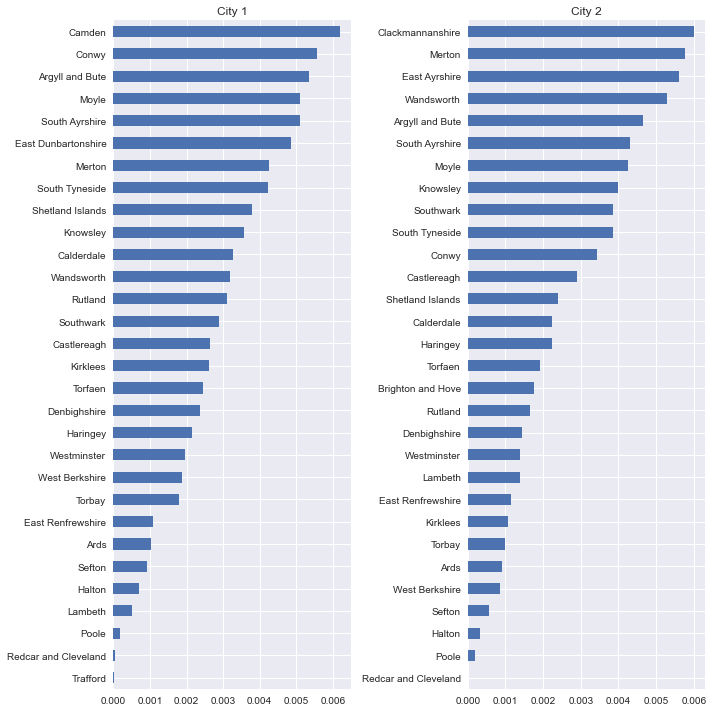

In [188]:
top_n = 30
fig,ax = plt.subplots(1,2,figsize=(10,10))
uk_city1_summary.sort_values()[:top_n].sort_values().plot.barh(ax=ax[0],title='City 1')
uk_city2_summary.sort_values()[:top_n].sort_values().plot.barh(ax=ax[1],title='City 2')
plt.tight_layout()

### Percentage of leaked accounts by relationship

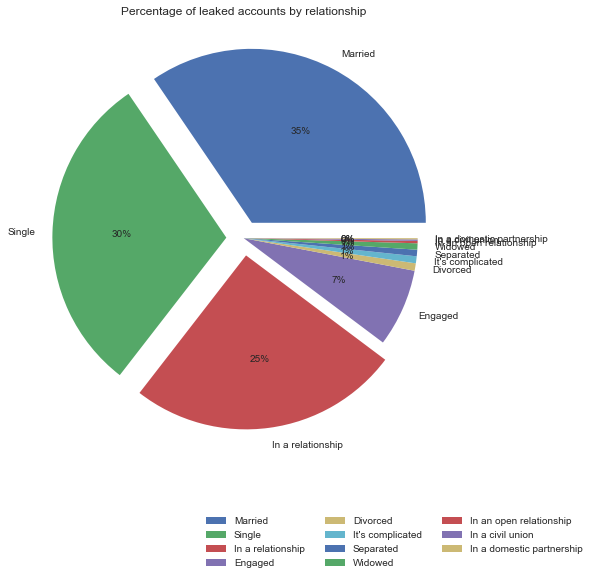

In [17]:
uk.relationship.value_counts().plot.pie(autopct='%1.0f%%',title='Percentage of leaked accounts by relationship',figsize=(8,8),explode=(0.1,0.1,0.1,0,0,0,0,0,0,0,0)).legend(bbox_to_anchor=(1.3,-0.12),ncol=3);
plt.ylabel('');

### Top 20 Companies by leaked accounts

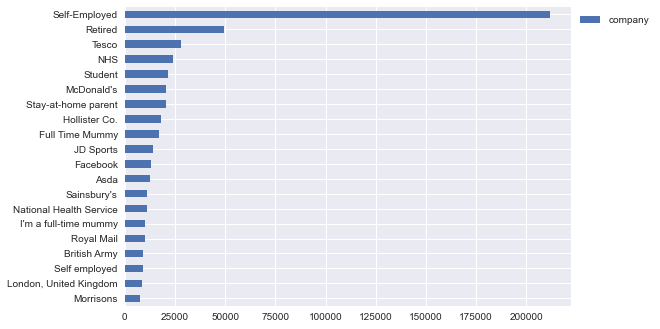

In [11]:
uk.company.value_counts()[:20].sort_values().plot.barh().legend(bbox_to_anchor=(1,1));

### Percentage of missing values in email addresses

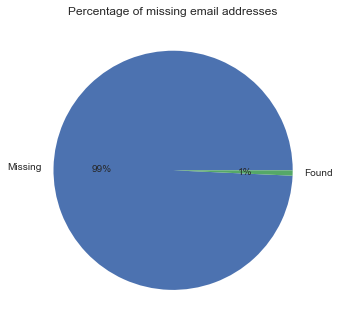

In [24]:
uk.email.isnull().value_counts().rename({True:'Missing',False:'Found'}).plot.pie(autopct='%1.0f%%',title='Percentage of missing email addresses');
plt.ylabel('');

### Percentage of missing values in phone number

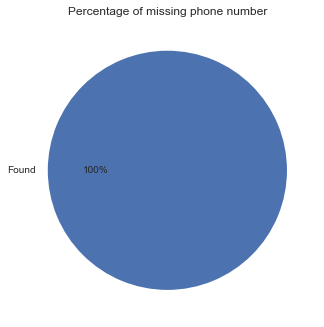

In [27]:
uk.phone_no.isnull().value_counts().rename({True:'Missing',False:'Found'}).plot.pie(autopct='%1.0f%%',title='Percentage of missing phone number');
plt.ylabel('');

## Conclusions

- Not many email addresses found in the data, however there is no missing phone number
- Using the user_id we can easily access the user profile `https://facebook.com/{user_id}`